### EDA Fichier Diabète

Validé par le client :

Pas de suppression de patients

Regarder chaque variable la skewness pour déterrminer si la moyenne ou la médiane sera utilisée pour remplacer les 0

Il n’y a qu’une colonne à supprimer : SkinThickness


##I - Import

- info

- describe

- création du dictionnaire de variables (df total) pour une meilleure compréhension

- recherche de Nan présentés en df

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
link = "https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv"

diabete = pd.read_csv(link)
diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Dictionnaire pour l'ensemble des variables du df
dict_continues = {
    "Pregnancies" : "Nombre de grossesses",
    "Glucose" : "Taux de glucose",
    "BloodPressure" : "Pression Artérielle",
    "SkinThickness" : "Epaisseur du pli cutané",
    "Insulin" : "Insuline",
    "BMI" : "IMC",
    "DiabetesPedigreeFunction" : "Antécédents Familiaux",
    "Age" : "Age",
    "Outcome" : "target"
}

In [ ]:
# Recherche des NaN
nan = diabete.isna().sum()
total_rows = len(diabete)

# Pour chaque colonne
df_nan = pd.DataFrame({
    'Lignes avec NaN': nan,
    'Pourcentage (%)': ((nan / total_rows) * 100).round(2)
}).sort_values(by='Lignes avec NaN', ascending=False)


# Renaming the columns in the DataFrame according to the translation dictionary
df_nan_nom = df_nan.rename(index=dict_continues)
df_nan_nom

,Lignes avec NaN,Pourcentage (%)
Nombre de grossesses,0,0.0
Taux de glucose,0,0.0
Pression Artérielle,0,0.0
Epaisseur du pli cutané,0,0.0
Insuline,0,0.0
IMC,0,0.0
Antécédents Familiaux,0,0.0
Age,0,0.0
target,0,0.0


In [ ]:
def afficher_doublons(df):
    """
    Détecte et affiche les lignes en double d'un DataFrame ainsi que leurs index.
    """

    pd.set_option('display.max_colwidth', None)

    # Trouver toutes les occurrences de doublons
    duplicates = df.duplicated(keep=False)

    # Extraire les lignes qui sont des doublons
    duplicated_rows = df[duplicates]

    if duplicated_rows.empty:
        print("Aucun doublon trouvé.")
    else:
        print("Index des lignes en double :")
        print(duplicated_rows.index.tolist())

        print("\nLignes en double trouvées :")
        print(duplicated_rows)

In [ ]:
afficher_doublons(diabete)

Aucun doublon trouvé.


In [ ]:
# Vérification de la proportion de la classe 'target' - Important pour le modèle
diabete['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##II - Création de dictionnaires selon type de variables

Pas besoin dans ce fichier

##III - Recherche d'irrégularités dans les colonnes et traitement

Code différent pour les variables catégorielle et continues (attention aux NA et Nan, ce code est adapté à la présence de Nan et non NA pour les variables numériques)

In [ ]:
# Sélection des colonnes de type int64 et float64, à l'exception de la colonne 'id'
continuous_vars = diabete.select_dtypes(include=['int64', 'float64']).columns
continuous_vars = [var for var in continuous_vars if var != 'id']

# Préparation des données pour le DataFrame
data = [{"Variable": var, "Description": dict_continues[var], "Unique Values": diabete[var].unique()} for var in continuous_vars]

# Création du DataFrame en utilisant pandas.concat
irregularities_continuous_vars = pd.concat([pd.DataFrame([d]) for d in data], ignore_index=True)

# Configurer l'affichage pour montrer le contenu complet des cellules
pd.set_option('display.max_colwidth', None)
# Configurer l'affichage pour montrer le contenu complet des cellules, toutes les valeurs
pd.set_option('display.max_seq_items', None)

# Tri de Unique Values en ordre ascendant, y compris NaN
irregularities_continuous_vars['Unique Values'] = irregularities_continuous_vars['Unique Values'].apply(
    lambda x: np.sort(x)  # Tri en incluant NaN
)

# Affichage du DataFrame
irregularities_continuous_vars


,Variable,Description,Unique Values
0,Pregnancies,Nombre de grossesses,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]"
1,Glucose,Taux de glucose,"[0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199]"
2,BloodPressure,Pression Artérielle,"[0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88, 90, 92, 94, 95, 96, 98, 100, 102, 104, 106, 108, 110, 114, 122]"
3,SkinThickness,Epaisseur du pli cutané,"[0, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99]"
4,Insulin,Insuline,"[0, 14, 15, 16, 18, 22, 23, 25, 29, 32, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122, 125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146, 148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170, 171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192, 193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230, 231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272, 274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318, 321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402, 415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 545, 579, 600, 680, 744, 846]"
5,BMI,IMC,"[0.0, 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20.0, 20.1, 20.4, 20.8, 21.0, 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.2, 29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.6, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2, 33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.2, 41.3, 41.5, 41.8, 42.0, 42.1, 42.2, 42.3, 42.4, 42.6, 42.7, 42.8, 42.9, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 44.0, 44.1, 44.2, 44.5, 44.6, 45.0, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 46.1, 46.2, 46.3, 46.5, 46.7, 46.8, 47.9, 48.3, 48.8, 49.3, 49.6, 49.7, 50.0, 52.3, 52.9, 53.2, 55.0, 57.3, 59.4, 67.1]"
6,DiabetesPedigreeFunction,Antécédents Familiaux,"[0.078, 0.084, 0.085, 0.088, 0.089, 0.092, 0.096, 0.1, 0.101, 0.102, 0.107, 0.108, 0.115, 0.118, 0.121, 0.122, 0.123, 0.126, 0.127, 0.128, 0.129, 0.13, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.14, 0.141, 0.142, 0.143, 0.144, 0.145, 0.147, 0.148, 0.149, 0.15, 0.151, 0.153, 0.154, 0.

**DETECTION** (valable pour les variables str)

In [ ]:
# Fonction pour détecter les irrégularités dans une cellule
def detect_irregularities(cell):
    if isinstance(cell, str):  # Vérifie si la cellule est une chaîne de caractères
        return any(c for c in cell if c in [' ', '\t', '?'] or not c.isprintable())
    return False

# Appliquer la fonction de détection à chaque cellule du DataFrame
irregularities = diabete.applymap(detect_irregularities)

# Trouver les colonnes et les lignes où il y a des irrégularités
irregular_cells = irregularities.any(axis=1)
irregular_columns = irregularities.any(axis=0)

# Afficher les résultats
print("Lignes avec irrégularités:", diabete[irregular_cells].index.tolist())
print("Colonnes avec irrégularités:", irregular_columns[irregular_columns].index.tolist())


Lignes avec irrégularités: []
Colonnes avec irrégularités: []


##IV - Modification de certaines valeurs, après validation auprès du client

Ici, ce sont les valeurs à 0 qui sont à étudier

##V - Recherche des 0 pour les variables continues

In [ ]:
# Identification des colonnes où les zéros ne sont pas attendus
colonnes_avec_zeros = diabete.select_dtypes(include=['int64', 'float64']).columns

# Calcul du nombre et du pourcentage de zéros dans chaque colonne concernée
nb_zero = diabete[colonnes_avec_zeros].isin([0]).sum()
zero_percentage = (nb_zero / len(diabete)) * 100

# Création d'un DataFrame pour présenter les résultats avec le nom de la variable et sa description
df_zeros = pd.DataFrame({
    'Variable': colonnes_avec_zeros,
    'Description': [dict_continues[col] if col in dict_continues else col for col in colonnes_avec_zeros],
    'nb_zero': nb_zero,
    'Zero Percentage (%)': zero_percentage
}).sort_values(by='nb_zero', ascending=False)

df_zeros.set_index('Variable', inplace=True)

df_zeros


,Description,nb_zero,Zero Percentage (%)
Variable,,,
Outcome,target,500,65.104167
Insulin,Insuline,374,48.697917
SkinThickness,Epaisseur du pli cutané,227,29.557292
Pregnancies,Nombre de grossesses,111,14.453125
BloodPressure,Pression Artérielle,35,4.557292
BMI,IMC,11,1.432292
Glucose,Taux de glucose,5,0.651042
DiabetesPedigreeFunction,Antécédents Familiaux,0,0.000000
Age,Age,0,0.000000


BEAUCOUP de 0 pour des variables importantes, jusqu'à près de 49% pour Insulin

5 colonnes concernées

 Extrait des 376 lignes avec 0.

In [ ]:
# On isole les lignes avec des zéros dans les colonnes spécifiées
rows_with_zeros_in_columns = diabete[(diabete['Glucose'] == 0) |
                                    (diabete['BloodPressure'] == 0) |
                                    (diabete['SkinThickness'] == 0) |
                                    (diabete['Insulin'] == 0) |
                                    (diabete['BMI'] == 0)
                                    ]

rows_with_zeros_in_columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


Où se trouvent les 0 ?
dans combien de colonnes ?

In [ ]:
# Colonnes à vérifier pour les zéros
columns_to_check = ['BMI', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# Extraction des lignes contenant des zéros dans n'importe laquelle des colonnes spécifiées
diabete_avec_zeros = diabete[(diabete[columns_to_check] == 0).any(axis=1)]

# Extraction des lignes avec des zéros dans toutes les 5 colonnes
diabete_avec_zeros_5_col = diabete[(diabete[columns_to_check] == 0).all(axis=1)]

# Extraction des lignes avec des zéros dans exactement 4, 3, 2, et 1 colonnes
diabete_avec_zeros_4_col = diabete[(diabete[columns_to_check] == 0).sum(axis=1) == 4]
diabete_avec_zeros_3_col = diabete[(diabete[columns_to_check] == 0).sum(axis=1) == 3]
diabete_avec_zeros_2_col = diabete[(diabete[columns_to_check] == 0).sum(axis=1) == 2]
diabete_avec_zeros_1_col = diabete[(diabete[columns_to_check] == 0).sum(axis=1) == 1]

# Résumé du nombre de lignes pour chaque condition
resume_compte = {
    "Lignes avec des zéros dans n'importe quelle des 5 colonnes": len(diabete_avec_zeros),
    "Lignes avec des zéros dans 5 colonnes": len(diabete_avec_zeros_5_col),
    "Lignes avec des zéros dans 4 colonnes": len(diabete_avec_zeros_4_col),
    "Lignes avec des zéros dans 3 colonnes": len(diabete_avec_zeros_3_col),
    "Lignes avec des zéros dans 2 colonnes": len(diabete_avec_zeros_2_col),
    "Lignes avec des zéros dans 1 colonne": len(diabete_avec_zeros_1_col)
}

resume_compte


{"Lignes avec des zéros dans n'importe quelle des 5 colonnes": 376,
 'Lignes avec des zéros dans 5 colonnes': 0,
 'Lignes avec des zéros dans 4 colonnes': 7,
 'Lignes avec des zéros dans 3 colonnes': 28,
 'Lignes avec des zéros dans 2 colonnes': 199,
 'Lignes avec des zéros dans 1 colonne': 142}

df reprennant les lignes avec 0 et une colonne indiquant la/les colonnes concernées

+ et extraits avec une colonne reprennant où sont situés les 0.

In [ ]:
# affichage de toutes les lignes
pd.set_option('display.max_rows', None)

In [ ]:
# Définir les colonnes spécifiques à vérifier pour les zéros
specific_columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Create a temporary DataFrame with an additional column for specific columns with zeros
temp_df = diabete.copy()
temp_df['Colonnes_Avec_Zero_Specifiques'] = temp_df[specific_columns_to_check].apply(lambda row: list(row[row == 0].index), axis=1)

# Filter to keep only rows with zeros in the specific columns
diabete_avec_zeros_specifiques = temp_df[temp_df['Colonnes_Avec_Zero_Specifiques'].apply(len) > 0]

# Display the first few rows of the filtered DataFrame for verification
diabete_avec_zeros_specifiques


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Colonnes_Avec_Zero_Specifiques
0,6,148,72,35,0,33.6,0.627,50,1,[Insulin]
1,1,85,66,29,0,26.6,0.351,31,0,[Insulin]
2,8,183,64,0,0,23.3,0.672,32,1,"[SkinThickness, Insulin]"
5,5,116,74,0,0,25.6,0.201,30,0,"[SkinThickness, Insulin]"
7,10,115,0,0,0,35.3,0.134,29,0,"[BloodPressure, SkinThickness, Insulin]"
9,8,125,96,0,0,0.0,0.232,54,1,"[SkinThickness, Insulin, BMI]"
10,4,110,92,0,0,37.6,0.191,30,0,"[SkinThickness, Insulin]"
11,10,168,74,0,0,38.0,0.537,34,1,"[SkinThickness, Insulin]"
12,10,139,80,0,0,27.1,1.441,57,0,"[SkinThickness, Insulin]"
15,7,100,0,0,0,30.0,0.484,32,1,"[BloodPressure, SkinThickness, Insulin]"


In [ ]:
# 4 df distincts avec ajout d'une colonne indiquant les colonnes où sont les 0
#diabete_avec_zeros_4_col['Colonnes_Avec_Zero'] = diabete_avec_zeros_4_col[columns_to_check].apply(lambda row: list(row[row == 0].index), axis=1)
#diabete_avec_zeros_3_col['Colonnes_Avec_Zero'] = diabete_avec_zeros_3_col[columns_to_check].apply(lambda row: list(row[row == 0].index), axis=1)
#diabete_avec_zeros_2_col['Colonnes_Avec_Zero'] = diabete_avec_zeros_2_col[columns_to_check].apply(lambda row: list(row[row == 0].index), axis=1)
#diabete_avec_zeros_1_col['Colonne_Avec_Zero'] = diabete_avec_zeros_1_col[columns_to_check].apply(lambda row: row[row == 0].index[0], axis=1)

Remplacement des 0 par des NaN

In [ ]:
diabete[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabete[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

##VI - VISUALISATIONS

##Analyse univariée : Distributions - Variables continues

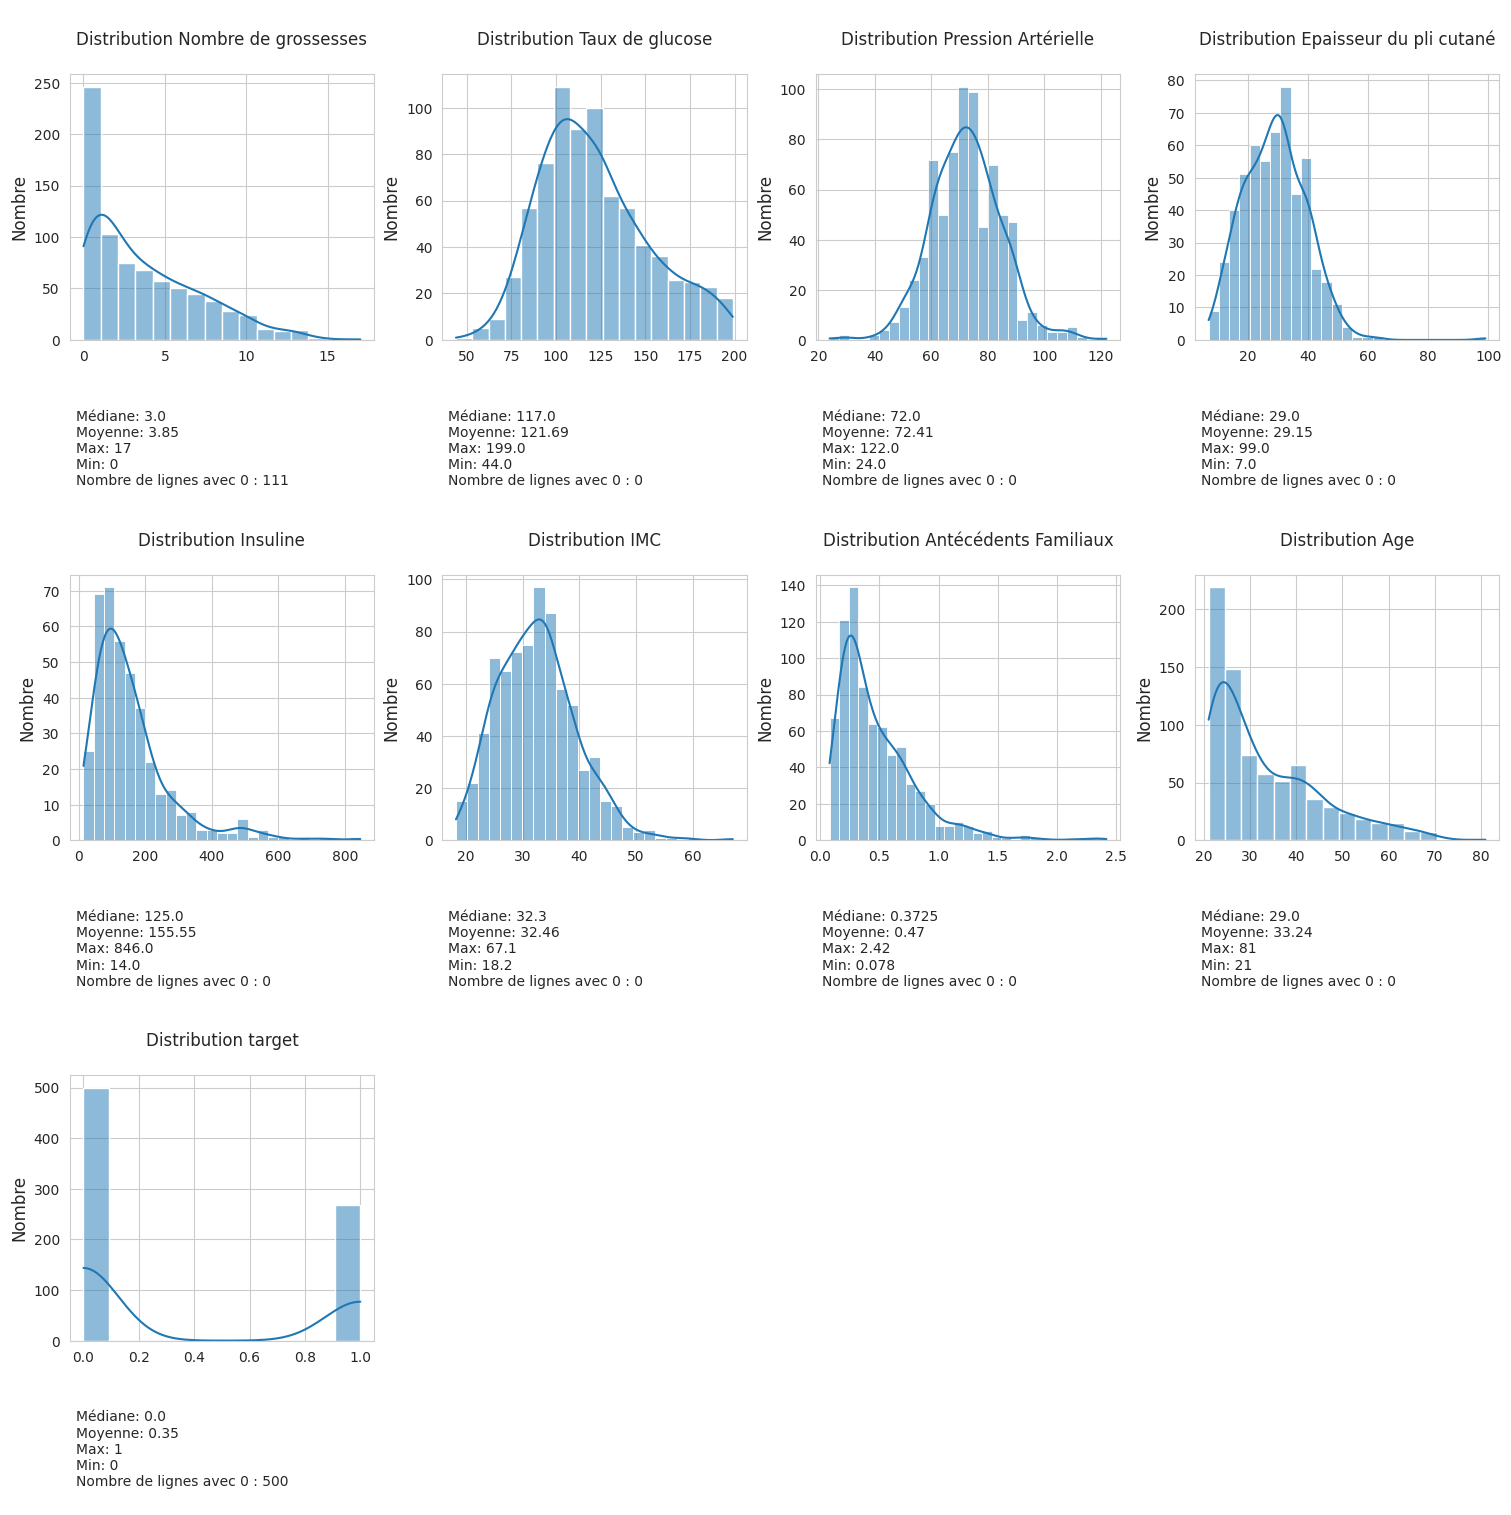

In [ ]:
# ATTENTION : Modifier le nom du df

# Configuration de subplots avec 3 colonnes et un nombre de lignes adapté
n_vars = len(dict_continues)  # Nombre de variables
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaire

# Création d'une figure pour les subplots
sns.set_style("whitegrid")
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Boucle pour créer un histogramme pour chaque variable
for i, col in enumerate(dict_continues.keys()):
    row = i // n_cols
    col_idx = i % n_cols
    sns.histplot(diabete[col], kde=True, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(f'\nDistribution {dict_continues[col]}\n', fontsize=12)
    axs[row, col_idx].set_xlabel('')
    axs[row, col_idx].set_ylabel('Nombre', fontsize=12)

    # Calcul des statistiques
    median_val = diabete[col].median()
    mean_val = round(diabete[col].mean(), 2)
    max_val = diabete[col].max()
    min_val = diabete[col].min()
    zero_count = diabete[diabete[col] == 0].shape[0]

    # Ajout de texte avec les statistiques à gauche sous le graphique
    stats_text = f'\nMédiane: {median_val}\nMoyenne: {mean_val}\nMax: {max_val}\nMin: {min_val}\nNombre de lignes avec 0 : {zero_count}\n'
    axs[row, col_idx].text(0.02, -0.2, stats_text, transform=axs[row, col_idx].transAxes, ha='left', va='top')

# Cacher les axes vides s'il y en a
for j in range(i + 1, n_rows * n_cols):
    row = j // n_cols
    col_idx = j % n_cols
    axs[row, col_idx].set_visible(False)

plt.show()


##Analyse univariée : Répartitions des données

In [ ]:
# Modifier le df pour un nouveau dataset
import plotly.express as px

# Liste de couleurs pastel pour les graphiques
colors = ['darkblue', 'green', 'orange', 'red', 'blue', 'brown', 'grey', 'orange']

# Tracer des box plots pour chaque variable continue avec des couleurs pastel
for col, color in zip(dict_continues.keys(), colors):
    fig = px.box(diabete, y=col, color_discrete_sequence=[color], notched=True, points="all", title=f'Distribution de {dict_continues[col]}')
    fig.update_layout(
        yaxis_title=dict_continues[col],
        xaxis_title='Nombre',
        title={
            'text': f'Répartition des données : {dict_continues[col]}',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        }
    )
    fig.show()


##Partie spécifique à chaque dataset : Extraits valeurs particulières / Observations

**Insuline**

In [ ]:
# Filtrage des lignes où la valeur d'Insulin est supérieure à 500
insulin_outliers = diabete[diabete['Insulin'] > 500].sort_values(by ='Insulin', ascending = False)
insulin_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
584,8,124.0,76.0,24.0,600.0,28.7,0.687,52,1
409,1,172.0,68.0,49.0,579.0,42.4,0.702,28,1
286,5,155.0,84.0,44.0,545.0,38.7,0.619,34,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
655,2,155.0,52.0,27.0,540.0,38.7,0.240,25,1
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


Beaucoup de valeurs abérrantes et 374 lignes à 0 : Illogique.

A partir de quelle valeur d'Insuline est-ce impossible ?

A titre indicatif, à jeun, l’insulinémie est normalement inférieure à 25 mIU / L (µUI / mL).

Elle est comprise entre 30 et 230 mIU / L environ 30 minutes après l’administration de glucose

Diabète si Insuline > à 200

A noter : L'hyperinsulinémie est une pathologie à part entière.

**IMC** (BMI)

In [ ]:
# Filtrage des lignes où la valeur d'Insulin est supérieure à 50
BMI_outliers = diabete[diabete['BMI'] > 50].sort_values(by ='BMI', ascending = False)
BMI_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1
445,0,180.0,78.0,63.0,14.0,59.4,2.420,25,1
673,3,123.0,100.0,35.0,240.0,57.3,0.880,22,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
120,0,162.0,76.0,56.0,100.0,53.2,0.759,25,1
303,5,115.0,98.0,NaN,NaN,52.9,0.209,28,1
193,11,135.0,NaN,NaN,NaN,52.3,0.578,40,1
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0


La médiane (32,0) et la moyenne (31,9) de l'IMC sont très proches l'une de l'autre ce qui indique une  distribution plus ou moins symétrique.

7 outliers entre 52.3 et 67,1.

Il y a 11 lignes dont la valeur de l'IMC est 0, à retenir et voir avec le client.

**Tension artérielle** (BloodPressure)

L'histogramme est plutôt symétrique.

Beaucoup de valeurs à 0 et/ou abérrantes.

La mesure présente est la tension artérielle Dyastolique (second chiffre, relâchement du coeur): normale entre 75 et 80

**Epaisseur du pli cutané** (SkinThickness)
1 outlier et 227 à 0 : illogique ou pas de prise de mesure.

**Antécédents familiaux** (DiabetesPedigreeFunction)
Une fonction qui évalue la probabilité de diabète en fonction des antécédents familiaux.

**Age**

La distribution de l'âge est asymétrique. Population plutôt jeune.

##Analyse univariée - Distribution - variables catégorielles - ADAPTER SELON DATASET

Distribution de la target

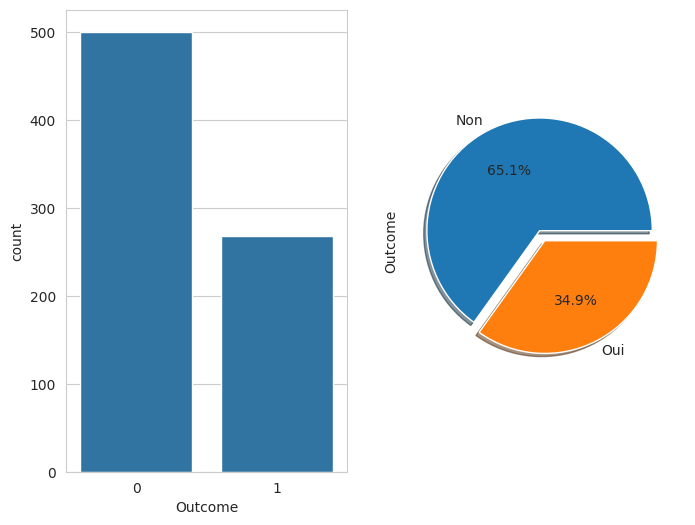

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

sns.countplot(data=diabete, x="Outcome", ax=ax[0])
diabete["Outcome"].value_counts().plot.pie(explode=[0.1, 0], autopct="%1.1f%%", labels=["Non", "Oui"], shadow=True, ax=ax[1])

plt.show()

## Matrice de corrélation

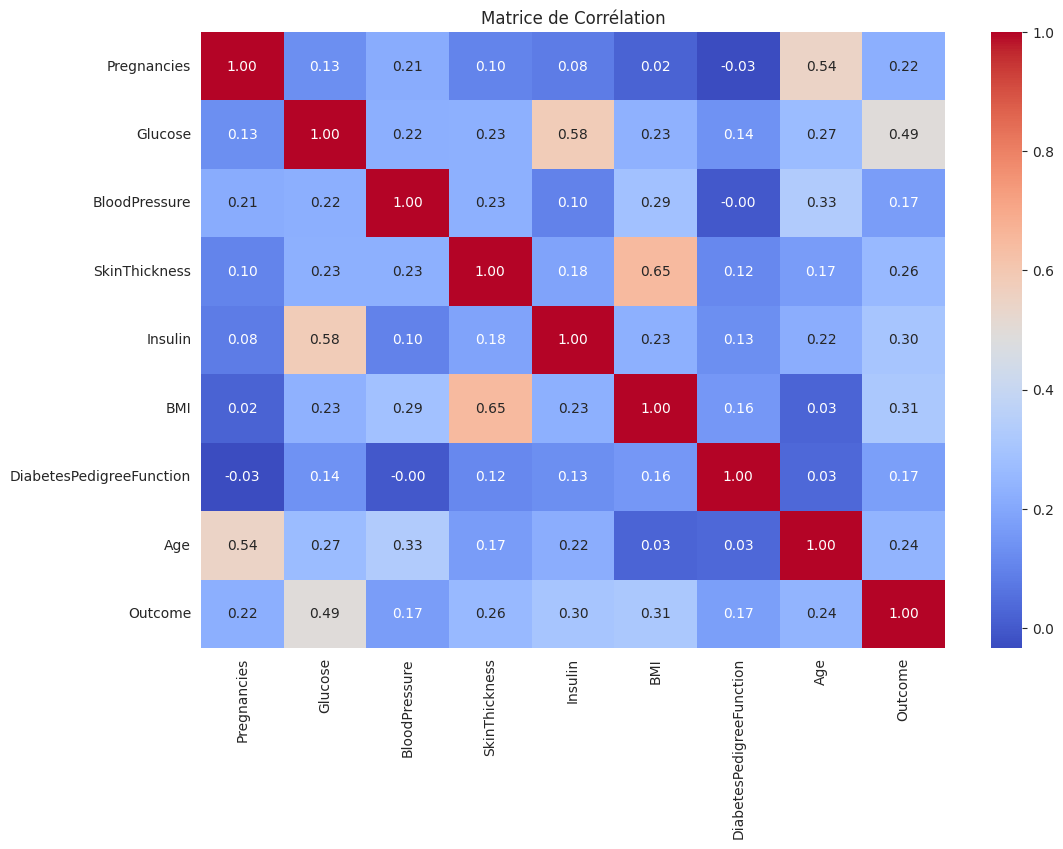

In [ ]:
# Calcul de la matrice de corrélation pour l'ensemble du jeu de données
correlation_matrix = diabete.corr()

# Affichage de la matrice de corrélation avec Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


Modifier le dictionnaire dans n_vars et enumerate et hue selon le df

##SKEWNESS des viariables pour décision de fillna

Variables : Glucose, BloodPressure, SkinThickness, Insulin, BMI

Sachant que SkinThickness peut être supprimée : Validation du client lors de la réunion du 04/05/2024 => en fin de notebook  (finalement non, essai ML avec et sans)



In [ ]:
# skewness AVANT traitement
# Légère asymétrie vers la droite, peu impactante pour analyse
diabete['Glucose'].skew()

0.5309885349396285

In [ ]:
def mean_target(var):
    temp = diabete[diabete[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return temp

In [ ]:
mean_target('Glucose')

,Outcome,Glucose
0,0,110.643863
1,1,142.319549


In [ ]:
# Remplacement de Insulin par la moyenne des Insuline (110.64) pour Outcome = 0
diabete.loc[(diabete['Outcome'] == 0) & (diabete['Glucose'].isnull()), 'Glucose'] = 110.64
# Remplacement de Insulin par la moyenne des Insuline (142.32) pour Outcome = 0
diabete.loc[(diabete['Outcome'] == 1) & (diabete['Glucose'].isnull()), 'Glucose'] = 142.3

In [ ]:
# skewness APRES remplacement par la moyenne
diabete['Glucose'].skew()

0.5309376373150614

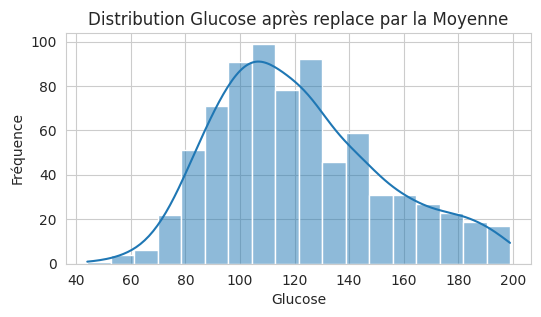

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(diabete['Glucose'], kde = True)
plt.title('Distribution Glucose après replace par la Moyenne')
plt.xlabel('Glucose')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [ ]:
# skewness AVANT traitement
# Asymétrie à gauche
diabete['BloodPressure'].skew()

0.13415273171959252

In [ ]:
mean_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.877339
1,1,75.321429


In [ ]:
# Remplacement de Insulin par la moyenne des Insuline (110.64) pour Outcome = 0
diabete.loc[(diabete['Outcome'] == 0) & (diabete['BloodPressure'].isnull()), 'BloodPressure'] = 70.88
# Remplacement de Insulin par la moyenne des Insuline (142.32) pour Outcome = 0
diabete.loc[(diabete['Outcome'] == 1) & (diabete['BloodPressure'].isnull()), 'BloodPressure'] = 75.32

In [ ]:
# skewness APRES traitement
diabete['BloodPressure'].skew()

0.13150569536466167

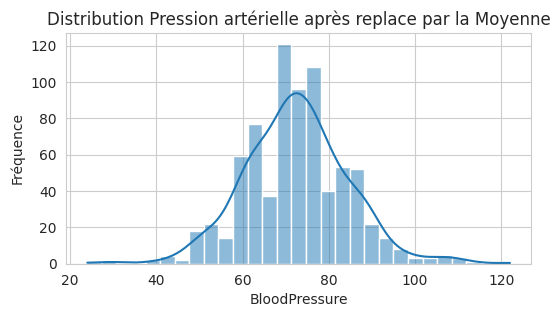

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(diabete['BloodPressure'], kde = True)
plt.title('Distribution Pression artérielle après replace par la Moyenne')
plt.xlabel('BloodPressure')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [ ]:
# Skewness AVANT traitement
# Forte asymétrie vers la droite
diabete['Insulin'].skew()

2.166463843812443

In [ ]:
def median_target(var):
    temp = diabete[diabete[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
def mean_target(var):
    temp = diabete[diabete[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return temp

In [ ]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [ ]:
mean_target('Insulin')

,Outcome,Insulin
0,0,130.287879
1,1,206.846154


In [ ]:
#Insulin est left-skewed
# Remplacement de Insulin par la médiane
diabete.loc[(diabete['Outcome'] == 0) & (diabete['Insulin'].isnull()), 'Insulin'] = 102.5
diabete.loc[(diabete['Outcome'] == 1) & (diabete['Insulin'].isnull()), 'Insulin'] = 169.5

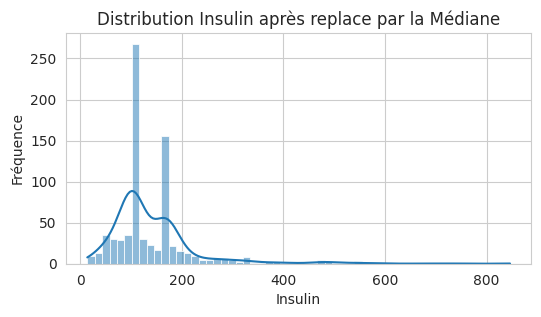

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(diabete['Insulin'], kde = True)
plt.title('Distribution Insulin après replace par la Médiane')
plt.xlabel('Insulin')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [ ]:
diabete['Insulin'].skew()

3.028046221170265

In [ ]:
# Skewness AVANT traitement
# Asymétrie vers la gauche
diabete['SkinThickness'].skew()

0.690619013984192

In [ ]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [ ]:
# Remplacement de SkinThickness par la médiane
diabete.loc[(diabete['Outcome'] == 0) & (diabete['SkinThickness'].isnull()), 'SkinThickness'] = 27
diabete.loc[(diabete['Outcome'] == 1) & (diabete['SkinThickness'].isnull()), 'SkinThickness'] = 32

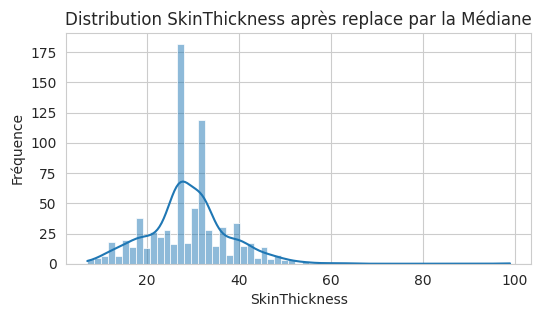

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(diabete['SkinThickness'], kde = True)
plt.title('Distribution SkinThickness après replace par la Médiane')
plt.xlabel('SkinThickness')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [ ]:
# Skewness avant traitement
# Asymétrie légère à gauche
diabete['BMI'].skew()

0.5939697505712673

In [ ]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [ ]:
# Remplacement de BMI par la médiane
diabete.loc[(diabete['Outcome'] == 0) & (diabete['BMI'].isnull()), 'BMI'] = 30
diabete.loc[(diabete['Outcome'] == 1) & (diabete['BMI'].isnull()), 'BMI'] = 34

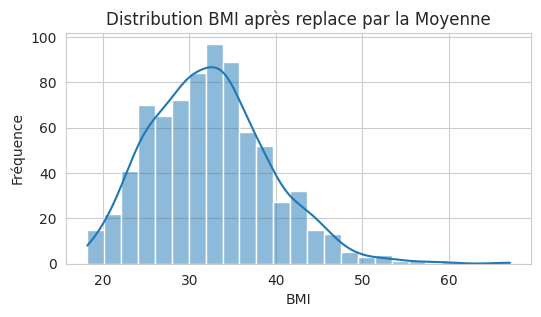

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(diabete['BMI'], kde = True)
plt.title('Distribution BMI après replace par la Moyenne')
plt.xlabel('BMI')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [ ]:
diabete.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

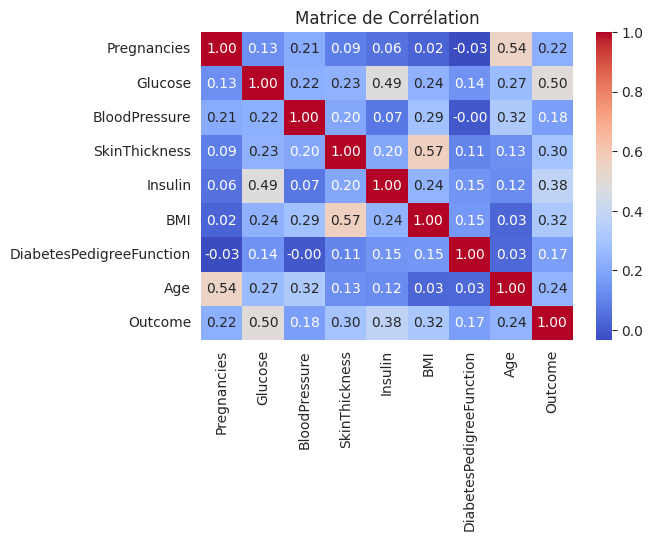

In [ ]:
# Calcul de la matrice de corrélation pour l'ensemble du jeu de données
correlation_matrix = diabete.corr()

# Affichage de la matrice de corrélation avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()

## Analyse bivariée / target

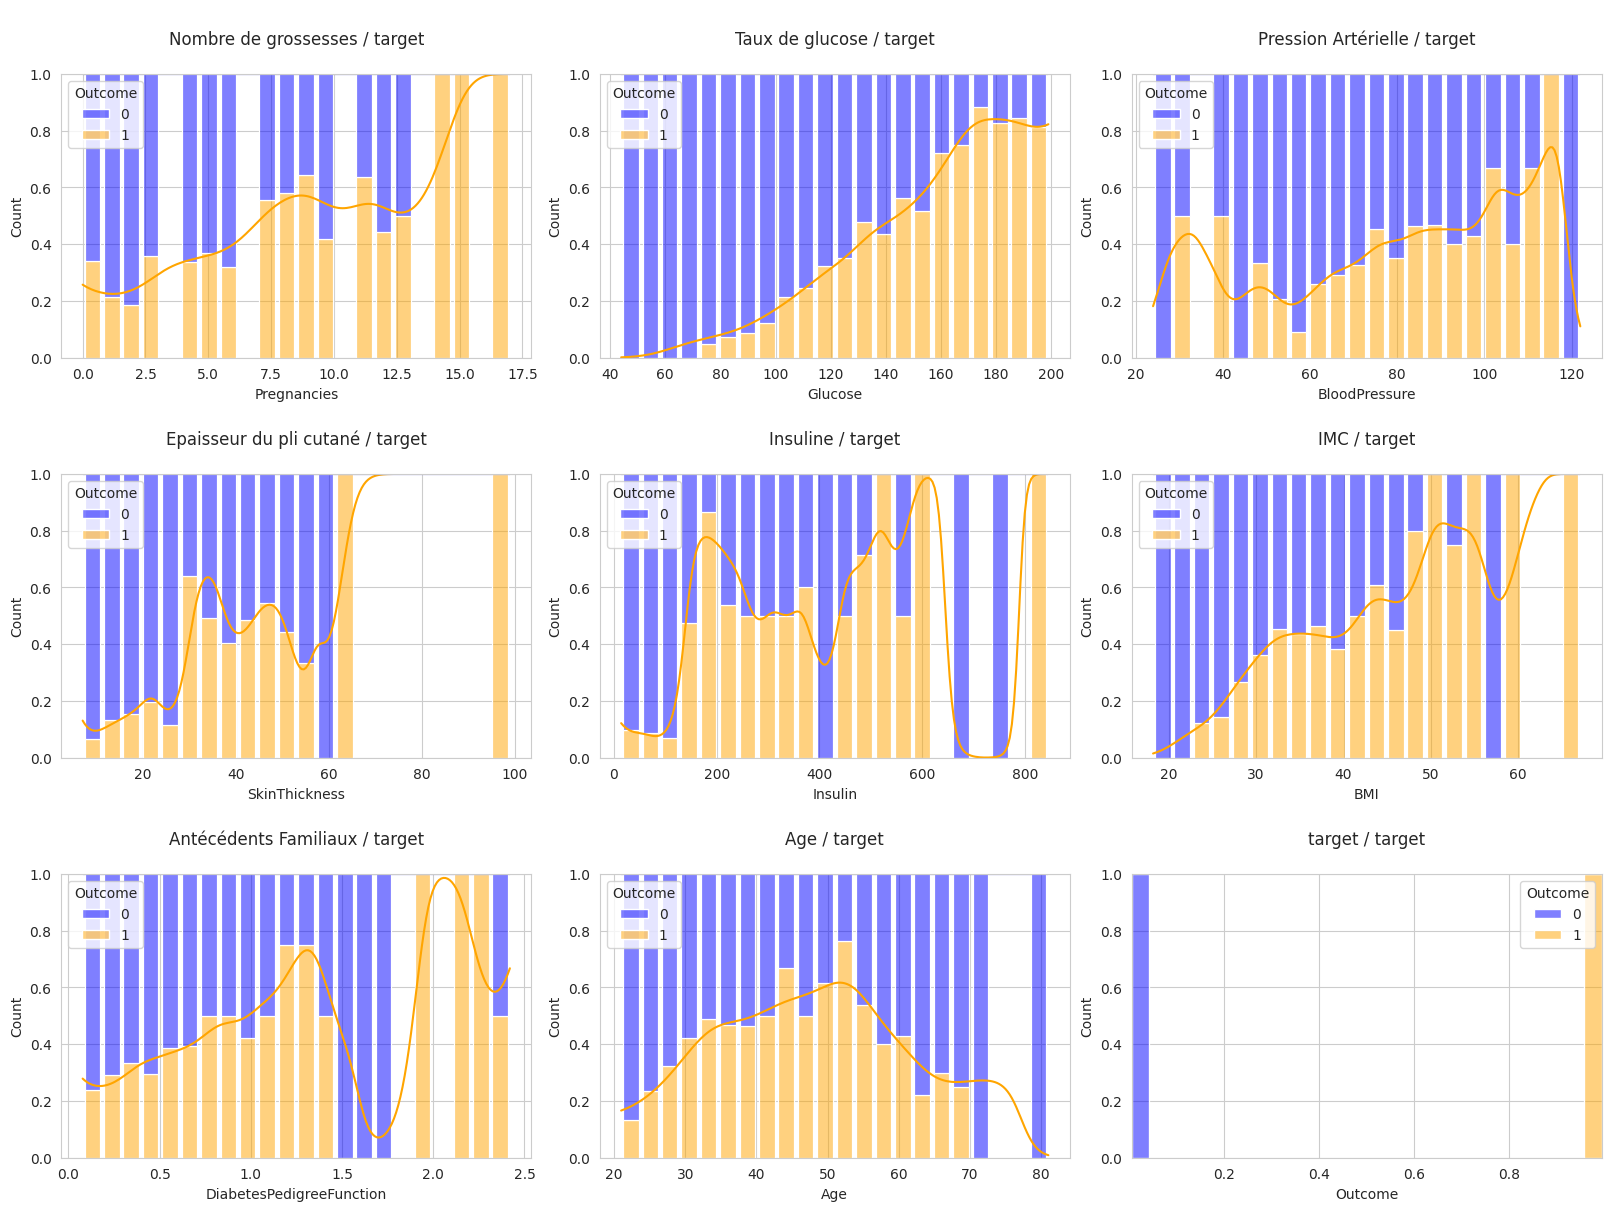

In [ ]:
# Définition des variables à inclure dans les histogrammes
n_vars = len(dict_continues)  # Nombre de variables

# Configuration de subplots avec 3 colonnes et un nombre de lignes adapté
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols  # Calcul du nombre de lignes nécessaire

# Création d'une figure pour les subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), constrained_layout=True)

# Boucle pour créer un histogramme pour chaque variable
for i, (var, var_french) in enumerate(dict_continues.items()):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(data=diabete,
                 x=var,
                 hue="Outcome",
                 shrink=0.8,
                 multiple="fill",
                 kde=True,
                 palette=['blue', 'orange'],
                 bins=22,
                 ax=axs[row, col])
    axs[row, col].set_title(f"\n{var_french} / target\n")

# Cacher les axes vides s'il y en a
for i in range(i + 1, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axs[row, col].set_visible(False)

plt.show()


In [ ]:
#import scipy
#scipy.stats.kruskal(*[group["Outcome"].values for name, group in diabete.groupby("Insulin")])

##VII - Après remplacement des 0 => p-value

In [ ]:
#pip install statannot

In [ ]:
#pip install statannotations

In [ ]:
print(sns.__version__)

0.13.1


In [ ]:
#pip uninstall seaborn

In [ ]:
#pip install seaborn==0.11.1

In [ ]:
diabete['Outcome'] = diabete['Outcome'].astype(str)

In [ ]:
'''import seaborn as sns
from statannot import add_stat_annotation
import scipy.stats as stats

# Définissez la taille de la figure pour l'affichage de tous les graphiques
plt.figure(figsize=(20, 15))

# Bouclez sur chaque variable (à l'exception de 'Outcome') et créez un boxplot
for i, column in enumerate(diabete.drop('Outcome', axis=1).columns):
    ax = plt.subplot(2, 4, i + 1)  # Ajustez la disposition en fonction du nombre de variables
    sns.boxplot(x='Outcome', y=column, data=diabete)
    ax.set_title(column)

    # Ajoutez l'annotation statistique
    test_results = add_stat_annotation(ax, data=diabete,
                                       x='Outcome',
                                       y=column,
                                       box_pairs=[("0", "1")],
                                       test="Kruskal",
                                       text_format="full",
                                       loc='outside',
                                       verbose=0)
    ax.set_title(column, y=1.2)

plt.subplots_adjust(hspace=0.6)  # Add space between the plots vertically
plt.show()
'''

'import seaborn as sns\nfrom statannot import add_stat_annotation\nimport scipy.stats as stats\n\n# Définissez la taille de la figure pour l\'affichage de tous les graphiques\nplt.figure(figsize=(20, 15))\n\n# Bouclez sur chaque variable (à l\'exception de \'Outcome\') et créez un boxplot\nfor i, column in enumerate(diabete.drop(\'Outcome\', axis=1).columns):\n    ax = plt.subplot(2, 4, i + 1)  # Ajustez la disposition en fonction du nombre de variables\n    sns.boxplot(x=\'Outcome\', y=column, data=diabete)\n    ax.set_title(column)\n\n    # Ajoutez l\'annotation statistique\n    test_results = add_stat_annotation(ax, data=diabete,\n                                       x=\'Outcome\',\n                                       y=column,\n                                       box_pairs=[("0", "1")],\n                                       test="Kruskal",\n                                       text_format="full",\n                                       loc=\'outside\',\n                

Les p-value indiquent que les différences entre classes sont significatives pour toutes les variables

##VIII - Machine Learning

Encoding et Random Over Sampler si besoin


diabete ne contient que des valeurs continues donc pas d'encoding mais mise à l'échelle (StandardScaler)

In [ ]:
#import des Encoder (pour les variables catégorielles)
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import LabelEncoder


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
diabete['Outcome'] = diabete['Outcome'].astype('int64')

In [ ]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


RANDOM OVER SAMPLER

In [ ]:
# Méthode RandomOverSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
X = diabete.drop('Outcome', axis=1)
y = diabete['Outcome']
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Initialiser le sur-échantillonneur
ros = RandomOverSampler(random_state=42)
# Appliquer le sur-échantillonnage
X_resampled, y_resampled = ros.fit_resample(X, y)
# Nouveau DataFrame avec les données sur-échantillonnées
diabete_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Outcome')], axis=1)

In [ ]:
diabete_resampled.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.00,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.00,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.00,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.00,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.00,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.00,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.00,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.88,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.00,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.00,32.0,169.5,34.0,0.232,54,1


In [ ]:
X = diabete_resampled.drop('Outcome', axis=1)
y = diabete_resampled['Outcome']

In [ ]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
'''def scaler_model_ml(X, y_int,modele_scaler,dico_modele_ml_hypparamètre, random_state, n_iter, cv) :
    '''
    Le paramètre y_int doit être forcément en int
    Le paramètre dico_modele_ml doit être sous cette forme : {modele_ml : {dico_hyperparamètres}}
    Si dico_hyperparamètres = None alors :
    Fonction faisant un train test split (préciser le random_state)
    Sinon :
    Fonction faisant un RandomizedSearchCV (préciser le n_iter)
    Scalant les données selon un modèle de scaler (instancier un modèle type : modele_scaler = StandardScaler())
    Et entrainant un modèle de machine learning dans le dico_modele_ml_hypparamètre sous forme : modele_ml = DecisionTreeClassifier())
    Renvoi deux df : les métrics (accurancy et le recall) et la matrice de confusion.
    pour les voir sous forme de df : df_metrics, df_matrice = appelle de la fonction
    '''

    for modele_ml, dico in dico_modele_ml_hypparamètre.items() :
        if dico == None :

            #Création du train test split
            X_train, X_test, y_train, y_test = train_test_split(X, y_int, random_state=random_state, train_size = 0.8)

            #Scalage des données
            scaler = modele_scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            #Entrainement d'un modèle
            model = modele_ml.fit(X_train_scaled, y_train)

            #Métriques
            Accuracy_train = model.score(X_train_scaled, y_train)
            Accuracy_test = model.score(X_test_scaled, y_test)
            Recall_train = recall_score(y_train, model.predict(X_train_scaled))
            Recall_test = recall_score(y_test, model.predict(X_test_scaled))
            classes = np.char.array(model.classes_)

            #Dataframe
            matrice = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test_scaled)),
                    index = classes + " ACTUAL",
                    columns = classes + " PREDICTED")
            eval_metrics = pd.DataFrame([[Accuracy_train, Accuracy_test, Recall_train, Recall_test]], columns=['Accuracy_train', 'Accuracy_test', 'Recall_train', 'Recall_test'])

        else :
            scaler = modele_scaler.fit(X)
            X_scaled = scaler.transform(X)
            model = RandomizedSearchCV(modele_ml, dico , n_iter=n_iter, cv=cv).fit(X_scaled,y_int)

            #Métriques
            Meilleur_score = model.best_score_
            Meilleur_parametres = model.best_params_
            Recall= recall_score(y_int, model.predict(X_scaled))
            classes = np.char.array(model.classes_)

            #Dataframe
            matrice = pd.DataFrame(data = confusion_matrix(y_true = y_int, y_pred = model.predict(X_scaled)),
                    index = classes + " ACTUAL",
                    columns = classes + " PREDICTED")
            eval_metrics = pd.DataFrame([[Meilleur_score, Meilleur_parametres, Recall]], columns=['Meilleur_score', 'Meilleur_parametres', 'Recall'])

    #Retour de la matrice de confusion et des métrics
    return eval_metrics, matrice'''

IndentationError: unexpected indent (<ipython-input-71-6e4b3adaab60>, line 3)

In [ ]:
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
liste_algo = [{RandomForestClassifier() : {'n_estimators': sp_randint(100, 500),'max_features': ['sqrt', 'log2'],'max_depth': sp_randint(4, 10),'criterion': ['gini', 'entropy']}},
            {HistGradientBoostingClassifier() : {'max_iter': sp_randint(100, 500),'max_depth': sp_randint(4, 10),'learning_rate': uniform(0.01, 0.2),'min_samples_leaf': sp_randint(20, 50)}},
            {GradientBoostingClassifier() : {'n_estimators': sp_randint(100, 500),'learning_rate': uniform(0.01, 0.2),'max_depth': sp_randint(4, 10),'min_samples_split': sp_randint(2, 10),'min_samples_leaf': sp_randint(1, 10)}},
            {LinearSVC() : {'C': uniform(0.1, 10),'max_iter': sp_randint(1000, 10000)}},
            {SVC() : {'C': uniform(0.1, 10),'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'gamma': ['scale', 'auto']}},
            {DecisionTreeClassifier() : {'max_depth': sp_randint(4, 10),'min_samples_split': sp_randint(2, 10),'min_samples_leaf': sp_randint(1, 10),'criterion': ['gini', 'entropy']}},
            {AdaBoostClassifier() : {'n_estimators': sp_randint(50, 500),'learning_rate': uniform(0.01, 1)}},
            {KNeighborsClassifier() : {'n_neighbors': sp_randint(3, 20),'weights': ['uniform', 'distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}},
            {XGBClassifier() : {'n_estimators': sp_randint(100,500),'max_depth': sp_randint(3, 10),'learning_rate': uniform(0.01, 0.2),'subsample': uniform(0.5, 0.5),'colsample_bytree': uniform(0.5, 0.5)}}]

In [ ]:
SS = StandardScaler()
MMS = MinMaxScaler()
MAS = MaxAbsScaler()
RS = RobustScaler(quantile_range=(25, 75))
PT = PowerTransformer(method="yeo-johnson")
QTU = QuantileTransformer(output_distribution="uniform", random_state=42)
QTN = QuantileTransformer(output_distribution="normal", random_state=42)
Nor = Normalizer()

scaler_list = [SS,MMS,MAS,RS,PT,QTU,QTN,Nor]

In [ ]:
'''for element in liste_algo :
    print(f"\033[1;97;40m Pour l'algorithme : {element.keys()} :\033[0m \n")
    for scaler in scaler_list :
        metrics, matrice = scaler_model_ml(X, y,scaler,element,123,30, 3)
        print(f"\033[1m Pour le scaler : {scaler} :\033[0m \n")
        display(metrics)
        print("\n")
        display(matrice)
        print("\n",50*"-","\n")'''

##IX - Machine Learning Optimisé (VOTING)

Un classificateur de vote est un modèle d'apprentissage automatique qui s'entraîne sur un ensemble de nombreux modèles et prédit une sortie (classe) en fonction de la probabilité la plus élevée de classe choisie comme sortie. Il regroupe simplement les résultats de chaque classificateur transmis au Voting Classifier et prédit la classe de sortie en fonction de la plus grande majorité de votes. L'idée est qu'au lieu de créer des modèles dédiés séparés et de trouver la précision pour chacun d'eux, nous créons un modèle unique qui s'entraîne à l'aide de ces modèles et prédit les résultats en fonction de leur majorité combinée de votes pour chaque classe de résultats.

**Avec l'ensemble des variables :**

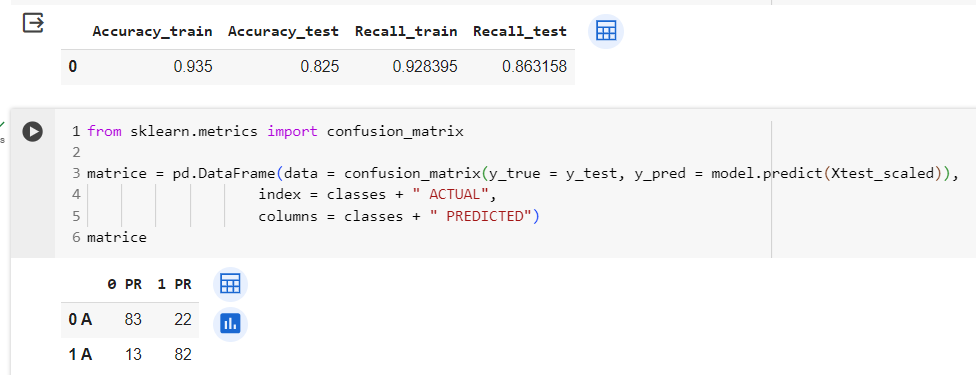

In [ ]:
diabete_resampled.columns

In [ ]:
X = diabete_resampled.drop(['SkinThickness', 'Outcome'], axis=1)
y = diabete_resampled['Outcome']

In [ ]:
X.columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)

In [ ]:
from sklearn.preprocessing import RobustScaler
#PowerTransformer(method="yeo-johnson")

scale = RobustScaler(quantile_range=(25, 75)).fit(X)
Xtrain_scaled = scale.transform(X_train)
Xtest_scaled = scale.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

RF =    RandomForestClassifier(criterion='entropy', max_depth= 9, max_features= 'log2', n_estimators= 199)
HGBC =  HistGradientBoostingClassifier(learning_rate= 0.049937562454874705, max_depth= 9, max_iter= 476, min_samples_leaf= 41)
GBC =   GradientBoostingClassifier(learning_rate= 0.11761847085283077, max_depth= 8, min_samples_leaf= 1, min_samples_split= 7, n_estimators= 410)
#KNN =   KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 10, weights= 'distance')
XGBC =  XGBClassifier(colsample_bytree= 0.7150712090768865, learning_rate= 0.04953964103163928, max_depth= 4, n_estimators= 396, subsample= 0.894181174680787)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('RF', RF), ('HGBC', HGBC), ('GBC', GBC), ('XGBC', XGBC)])
model = voting.fit(Xtrain_scaled, y_train)

#voting = VotingClassifier(estimators=[('RF', RF), ('HGBC', HGBC), ('GBC', GBC), ('XGBC', XGBC)], voting='soft')
#soft =


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

Accuracy_train = model.score(Xtrain_scaled, y_train)
Accuracy_test = model.score(Xtest_scaled, y_test)
Recall_train = recall_score(y_train, model.predict(Xtrain_scaled))
Recall_test = recall_score(y_test, model.predict(Xtest_scaled))
classes = np.char.array(model.classes_)

# Ajout du calcul du F1 score
F1_train = f1_score(y_train, model.predict(Xtrain_scaled))
F1_test = f1_score(y_test, model.predict(Xtest_scaled))

# Création d'un DataFrame pour afficher les résultats
metric = pd.DataFrame([[Accuracy_train, Accuracy_test, Recall_train, Recall_test, F1_train, F1_test]],
                        columns=['Accuracy_train', 'Accuracy_test', 'Recall_train', 'Recall_test', 'F1_train', 'F1_test'])
metric

In [ ]:
from sklearn.metrics import confusion_matrix

matrice = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(Xtest_scaled)),
                    index = classes + " ACTUAL",
                    columns = classes + " PREDICTED")
matrice

**Pour l'Application**

In [ ]:
data_scaler = RobustScaler(quantile_range=(25, 75)).fit(X)

In [ ]:
data_algo = voting.fit(Xtrain_scaled, y_train)

In [ ]:
# skops pour sauvegarder les données
!pip install skops

In [ ]:
from skops.io import dump, load

In [ ]:
# On sauvegarde data_scaler dans un ficheir binaire (photo)
dump(data_scaler, "data_scaler_diabete.skops")

In [ ]:
dump(data_algo, "data_algo_diabete.skops")

##X - Test Prédiction - Post Voting

In [ ]:
X_pred = diabete_resampled.drop(['SkinThickness', 'Outcome'], axis=1).iloc[:4]
y = diabete_resampled['Outcome'].iloc[:4]

In [ ]:
X_pred

In [ ]:
X_pred.to_csv("diabete_pred.csv",index=False)

In [ ]:
y

In [ ]:
scale = RobustScaler(quantile_range=(25, 75)).fit(X)
Xpred_scaled = scale.transform(X_pred)

In [ ]:
matrice = pd.DataFrame(data = confusion_matrix(y_true = y, y_pred = model.predict(Xpred_scaled)),
                    index = classes + " ACTUAL",
                    columns = classes + " PREDICTED")
matrice

**LASSO CV ET SHAP**

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
fig = plt.figure(figsize=(6,6))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importance des variables en utilisation un modèle Lasso")
fig.savefig('importance_graph.png', dpi=200, bbox_inches = 'tight');

In [ ]:
# Créer et entraîner le modèle Lasso CV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Utiliser le modèle Lasso CV avec SHAP
explainer = shap.Explainer(lasso_cv, X_train)
shap_values = explainer.shap_values(X_test)

# Afficher un résumé des valeurs SHAP
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

##PYCARET

In [ ]:
'''diabete_final = diabete

In [ ]:
diabete_final.to_csv('diabete_final.csv', index=False)

Pour le ML :
- un df avec Insulin fillna avec médiane
- un df avec Insulin fillna avec régression linéaire

In [ ]:
'''!pip install pycaret'''

In [ ]:
from pycaret.classification import *
s = setup(diabete, target = 'Outcome', session_id = 123)

In [ ]:
best = compare_models()